<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Projeto** | Análise de Dados de Crédito com SQL e  Amazon Web Service (AWS)

Analista [Taíta B. Ramos](https://www.linkedin.com/in/ta%C3%ADta-b-ramos-4448ba121/)

Projeto realizado para conclusão do Módulo 36 SQL do Curso Profissão Analista de Dados da EBAC.

---

# **Tópicos**

<ol type="1">
  <li>Dados;</li>
  <li>Criação da tabela e algumas queries; </li>
  <li>Exploração e análise dos dados de crédito; </li>
  <li>Conclusão.</li>
</ol>

# **O PROJETO**

Este projeto visa analisar os limites de créditos de um conjunto de clientes bancários e verificar se há relação entre as suas caracteríricas e se elas impactam em quem possua mais ou menos limite de crédito


# **1. Dados**

A base de dados utilizada neste projeto contém informações bancárias de diversos clientes e foi adaptada a partir de arquivos públicos disponíveis no repositório do GitHub do Prof. André M. Perez. Esses dados são usados nos cursos da EBAC voltados para a área de dados.

As colunas que compõem essa base estão listadas abaixo:

- idade = idade;
- sexo = sexo (F ou M);
- dependentes = número de dependentes;
- escolaridade = nível de escolaridade;
- salario_anual = faixa salarial;
- tipo_cartao = tipo de cartão;
- qtd_produtos = quantidade de produtos comprados nos últimos 12 meses;
- iteracoes_12m = quantidade de iterações/transações nos últimos 12 meses;
- meses_inativo_12m = quantidade de meses que ficou inativo;
- limite_credito = limite de crédito;
- valor_transacoes_12m = valor das transações dos últimos 12 meses;
- qtd_transacoes_12m = quantidade de transações dos últimos 12 meses.

A versão original dos dados encontra-se em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset.

# **2. Criação de bucket e da tabela**

> Utilizaremos as plataformas online AWS S3 e AWS Athena para armazenamento e consulta de dados respectivamente e para respeitar a limitação ref. ao uso gratuito dos serviços, nossa base de dados foi reduzida.

* No AWS S3 criaremos a pasta bucket-tatabr-transacoes-ebac e carreguaremos o arquivo **credito.csv** que contém as informações para análise.

* No AWS Athena criaremos a tabela credito com o comando abaixo:

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
  idade int,
  sexo string,
  dependentes int,
  escolaridade string,
  estado_civil string,
  salario_anual string,
  tipo_cartao string,
  qtd_produtos bigint,
  iteracoes_12m int,
  meses_inativo_12m int,
  limite_credito float,
  valor_transacoes_12m float,
  qtd_transacoes_12m int)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ',')
LOCATION 's3://bucket-tatabr-transacoes-ebac/'
TBLPROPERTIES ('has_encrypted_data'='false');
```

# **3. Exploração e análise dos dados de crédito**

Toda exploração e análise de dados será feita por comandos SQL no AWS Athena.

## 3.1 Exploração dos Dados

> Visualizando como são os dados dos clientes:

```sql
select * from credito limit 10;
```
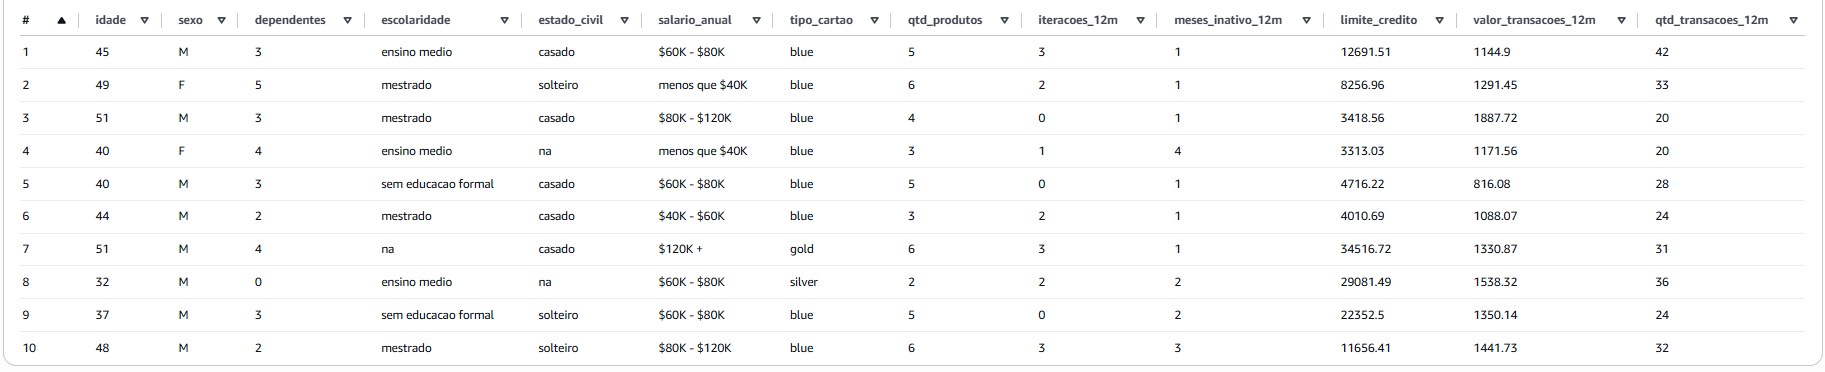

> Quantas informações temos no dataset:

```sql
select count(*) from credito
```

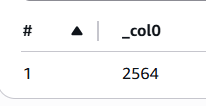

> Visualizando quais são as colunas que compõem o dataset assim como o tipo de cada uma:

```sql
DESCRIBE credito
```
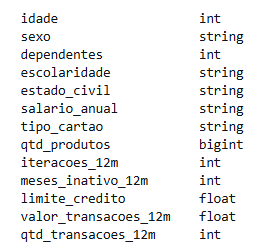

>> Além de atributos numéricos temos também atributos categóricos neste dataset. Iremos verificar como exatamente são essas informações.

> Quais são os níveis de escolaridade dos clientes?

```sql
SELECT DISTINCT escolaridade FROM credito
```
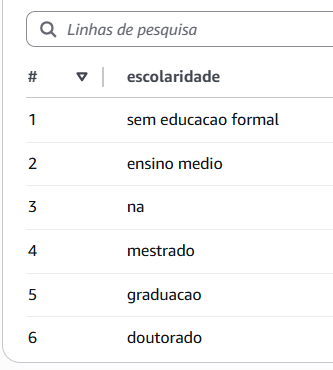

> Quais são as informações sobre estado civil?

```sql
SELECT DISTINCT estado_civil FROM credito
```

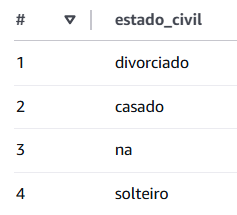

> Salário anual geralmente é um atributo numérico mas neste caso está distribuído como um intervalo de valores e do tipo string:

```sql
SELECT DISTINCT salario_anual FROM credito
```

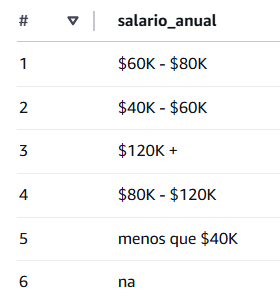

> Quais os tipos de cartão informados?

```sql
SELECT DISTINCT tipo_cartao FROM credito
```

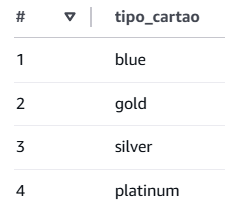


> A coluna sexo está totalmente preenchida ou temos valores nulos?

```sql
SELECT DISTINCT sexo FROM credito
```

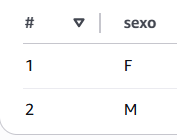

## 3.2 Análise dos Dados

>> Após as visualizações anteriores, podemos prosseguir realizando algumas análises.

> Quantos clientes há em cada faixa salarial:

```sql
select count(*), salario_anual
from credito
group by salario_anual
```

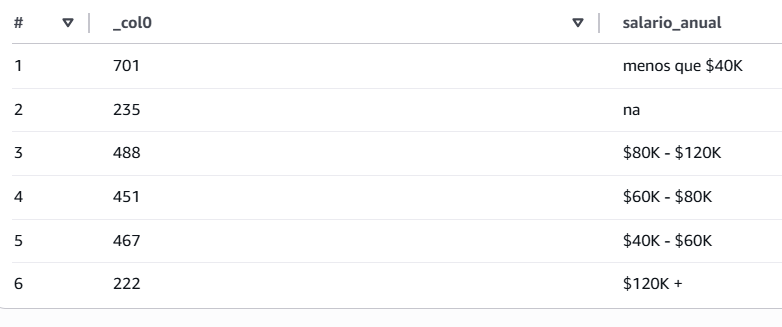

- A maioria dos clientes possuem salário anual menor que 40K enquanto que uma minoria correspnde a faixa salaarial maior.

- 235 clientes não informaram a faixa salarial ou não foi possível definir qual seria.
- Entre as faixas salariais de 80k até 60K vemos que temos uma distribuição uniforme do total de clientes.

> Gráfico gerado para melhor visualização:

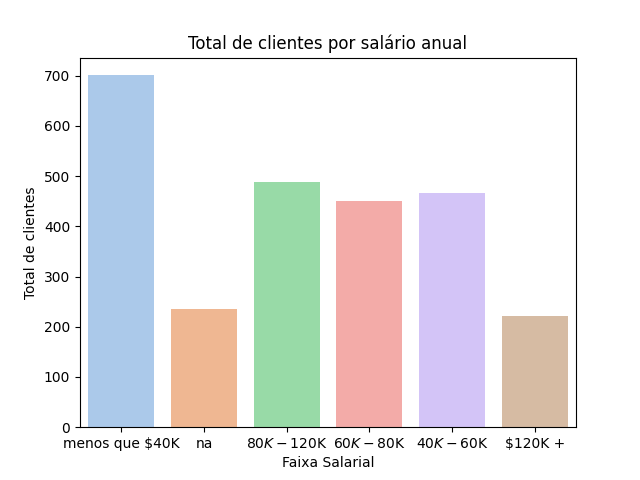

> Quantos clientes são homens e quantos são mulheres:

```sql
select count(*), sexo
from credito
group by sexo
```

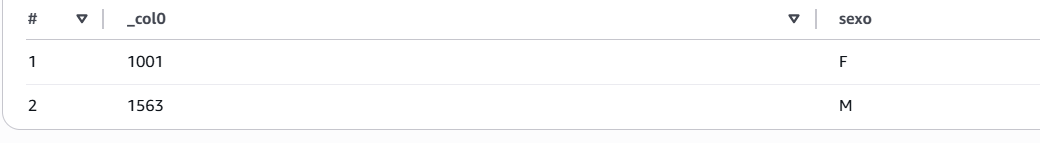

> Gráfico gerado para melhor visualização:

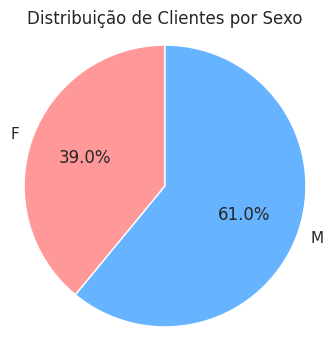

> Qual a idade dos clientes homens e mulheres:

```sql
select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo
from credito
group by sexo
```

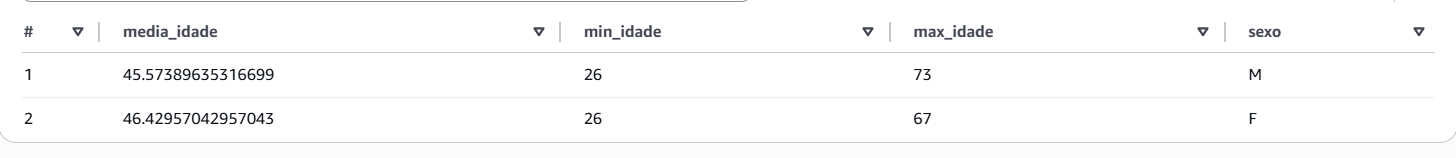

- Pelo resultado verificamos que não temos grandes diferenças de idade entre os clientes do sexo masculino e feminino, a distribuição das idades entre os sexos se assemelham bastante.

> Qual a maior e a menor transação em 12 meses:

```sql
select min(valor_transacoes_12m) as transacao_minima, max(valor_transacoes_12m) as transacao_minima
from credito
```

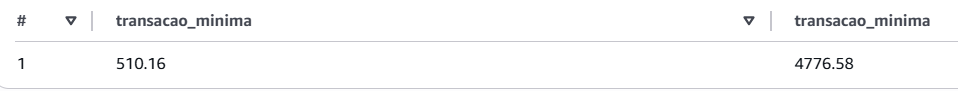

> Qual o perfil dos clientes com maiores limites de crédito, excluindo da análise as informações nulas de escolaridade e tipo do cartão:

```sql
select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo
from credito
where escolaridade != 'na' and tipo_cartao != 'na'
group by escolaridade, tipo_cartao, sexo order by limite_credito desc limit 10
```

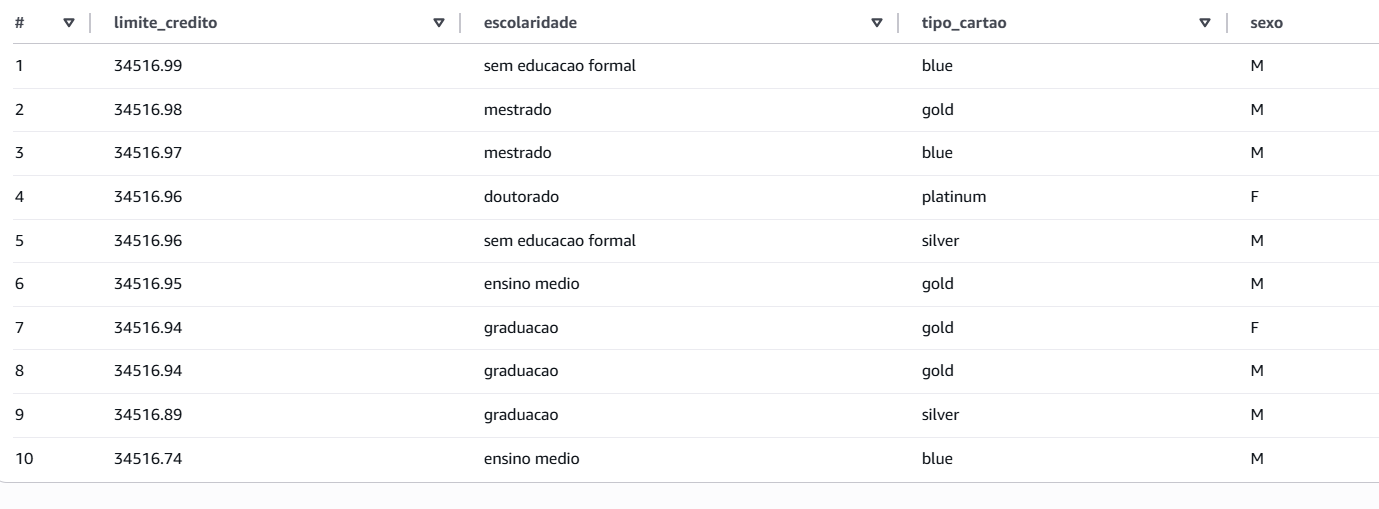

- Aparentemente os clientes do sexo masculino são os que possuem em sua maioria os maiores limites de crédito e tanto a escolaridade quanto o tipo de cartão não influenciam neste limite pois temos clientes sem educação formal com limite maior que outras escolaridade e os tipos de cartão estão bem variados entre os limites.
- Alguns clientes que possuem maior limite de crédito possuem cartão blue e não platinum, isso é um ponto que também poderia ser verificado.

> Qual o perfil dos clientes com menores limites de crédito, excluindo da análise as informações nulas de escolaridade e tipo do cartão::

```sql
select min(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo
from credito
where escolaridade != 'na' and tipo_cartao != 'na'
group by escolaridade, tipo_cartao, sexo order by limite_credito desc
```

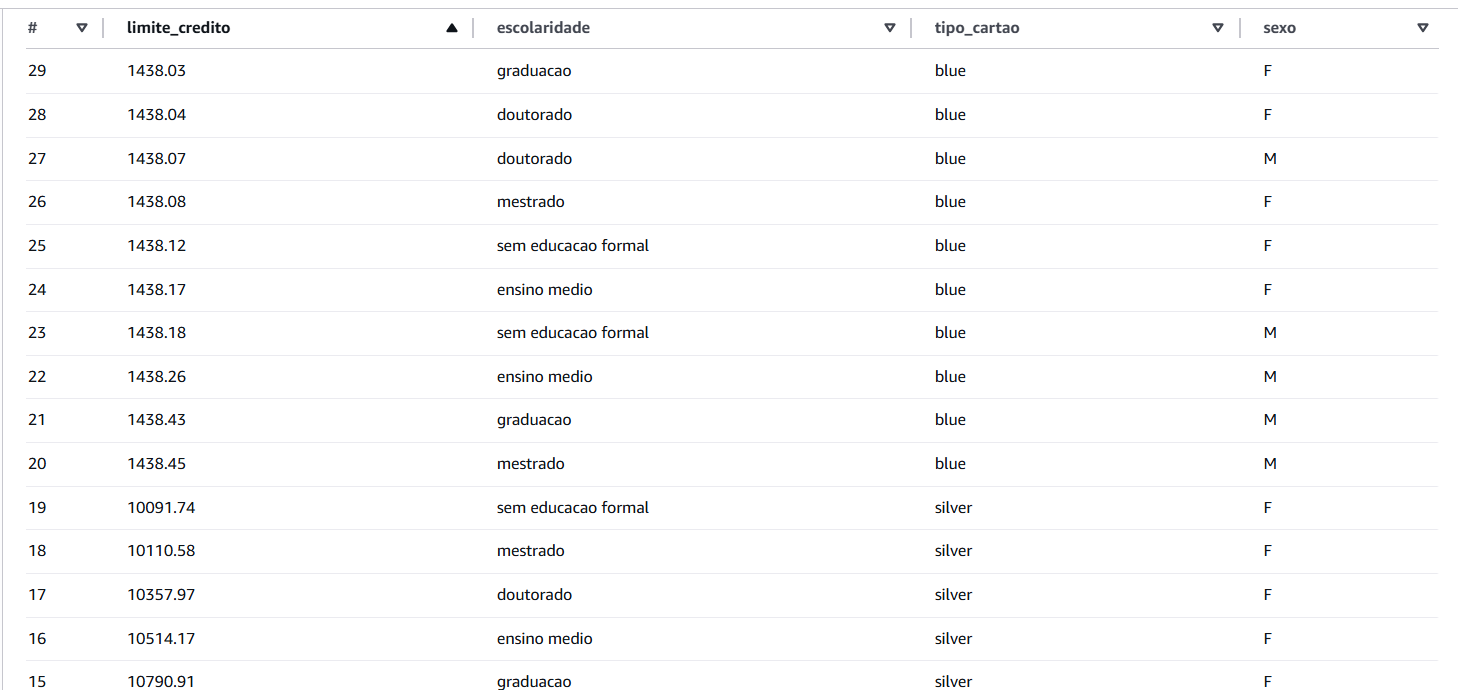

- Aparentemente, clientes de ambos os sexo possuem os menores limites de crédito, mas os clientes de sexo feminino parecem ser a maioria. O nível de escolaridade não influencia nestes limites pois estão bem variados e o tipo de cartão existente nesta modalidade em sua maioria é o tipo blue.

> Quais clientes possuem o maior e o menor gasto? Homens ou mulheres?:

```sql
select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo
from credito
group by sexo
```

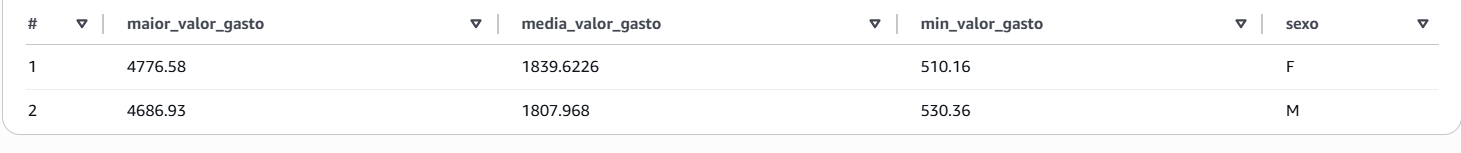

- Ambos os sexos possuem valores similares ref. aos gastos então não é possível afirmar que um determinado sexo gasta menos ou mais que o outro.

> A faixa salarial impacta no limite de crédito dos clientes?

```sql
select avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual
from credito
where salario_anual != 'na'
group by sexo, salario_anual order by avg(valor_transacoes_12m) desc
```


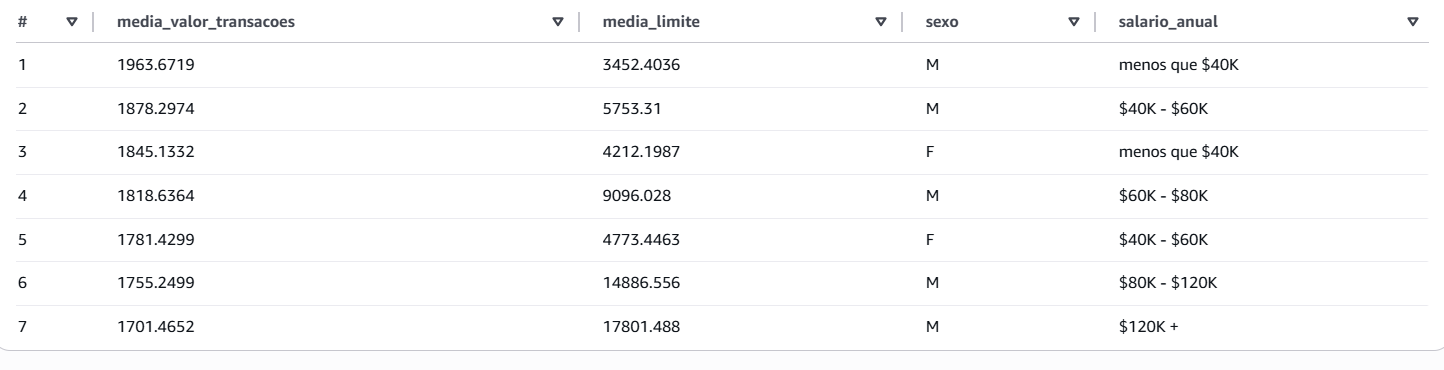

> Ordenando pelo sexo através dos filtros do AWS Athena:

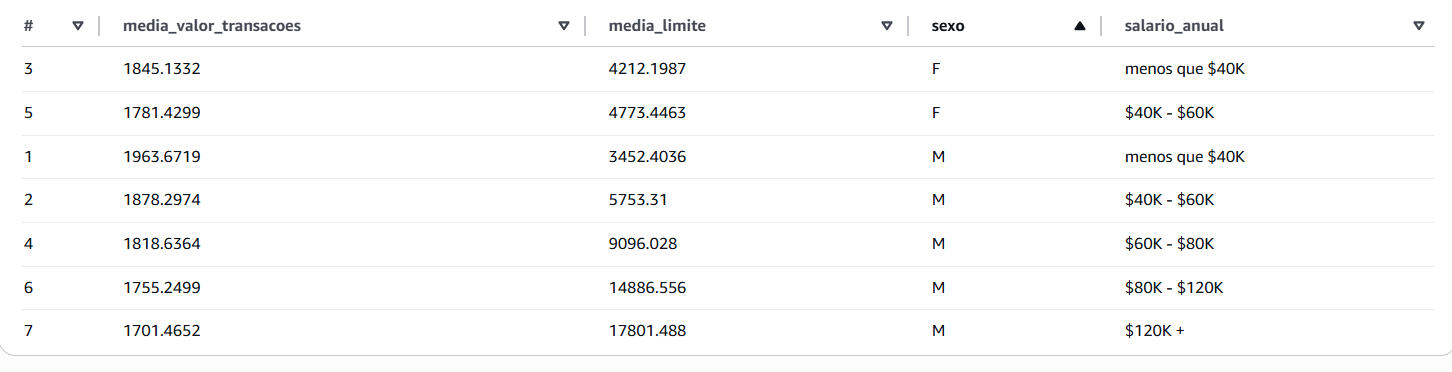

- Indepentende do sexo do cliente, a faixa salarial impacta sim no limite de crédito, pois claramente vemos que quem possue uma faixa salarial maior tem maior o limite assim como quem está na faixa menor tem o limite menor.
- Levando em consideração o sexo do cliente, conseguimos visualizar claramente que os clientes do sexo feminino fazem parte dos menores salários anuais, que estão na faixa de menos 40k até 60k, e consequentemente possuem em média os menores limites de crédito comparado aos homens. Também temos clientes homens que estão nesta faixa mas os homens são os únicos que estão com os maiores limites de crédito assim como o salário anual.

> Gráfico gerada para melhor visualização da relação entre a média do limite de crédito, o sexo e a faixa salarial:

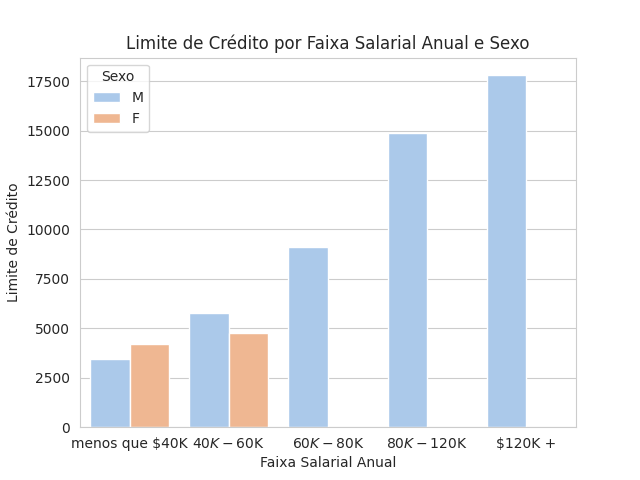

# **3. Conclusão**

Após a análise realizada, podemos concluir:

- A maioria dos clientes do dataset é composto pelo sexo masculino.
- A maioria dos clientes está na faixa salarial menos que 40k e a minoria acima de 120K.
- A idade e o nível de escolaridade não influenciam no limite de crédito.
- Não há diferença considerável entre os gastos de clientes do sexo masculino e feminino.
- A faixa salarial influencia diretamente no limite de crédito.
- Clientes do sexo masculino ocupam todas as faixas salariais, exclusivamente entre 60k até mais de 120k, consequentemente possuem o maior limite de crédito.
- Clientes do sexo feminino ocupam apenas as faixas salariais de menos 40k até 60k e consequentemente possuem o menor limite de crédito.
- Alguns clientes com maiores limites de crédito possuem cartão blue.
- Com os dados existentes neste dataset não há como estabelecer se há outros motivos, além do salário, pelo qual clientes do sexo feminino possuem menor limite de crédito, isso envolveria a análise de mais dados.

